In [2]:
import os
import json
import pandas as pd

## old new text 분할

In [3]:
# List all files in the './data/validation' directory
files = os.listdir('./data/validation')

# Filter for JSON files
json_files = [file for file in files if file.endswith('.json')]

# Read the first JSON file
if json_files:
    first_json_file_path = os.path.join('./data/validation', json_files[0])
    with open(first_json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    result = {"status": "success", "file_path": first_json_file_path, "data": data}
else:
    result = {"status": "error", "message": "No JSON files found in the directory."}

result

{'status': 'success',
 'file_path': './data/validation/REPORT-literature-06972-06972.json',
 'data': {'Meta(Acqusition)': {'doc_id': 'REPORT-literature-06972',
   'doc_category': 'REPORT',
   'doc_type': 'literature',
   'doc_name': '이리',
   'author': '김남천',
   'publisher': None,
   'publisher_year': None,
   'doc_origin': '저작권위원회'},
  'Meta(Refine)': {'passage_id': 'REPORT-literature-06972-06972',
   'passage': ' “그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 신문 기사는 결국 한 편의 사실밖엔 아무 것도 아니 되지만, 그렇 게 집어치우기는 아까운 대목이 하나 있으니 그걸 내 지금 김형에게 들려줄 테란 말이오.” 내가 정색하는 것을 기다려 박군은 다시 술 한 잔을 따라 맛있게 들이마시 고, 나의 얼굴을 쳐다보았다. “서울의 카즈바 ⎯.” 이렇게 박군의 이야기는 시작되었다. 별이야 있든 없든 달 없는 밤에 전찻길 위에 서서 그곳을 쳐다보면 꼭 마 천루를 바라보는 것 같으다. 무학재를 마주 서서 왼편은, 금화산(金華山) 밑으로 어둑시근한 감옥이 아파트처럼 엿보이는데 높은 담장의 화살 같은 일직선의 등허리를 태양처럼 눈이 부신 전등이 군데군데 날카로운 불광을 퍼붓고 있다. 이 불광이 희미하게 사라지는 곳에 밀매음의 소굴로서 이름이 떼어 관동(館洞)이 있었고 그 중턱엔 이 또한 이름이 높은 도수장이 끼어 있었다 한편 무학제 좁디좁은 . 골짜구니로부터 유난히 까끕 서서 올라 뻗은 산봉우리는 북악(北嶽)이 되기 전에 우선 인왕산이 되어버렸는데 우중충한 산그림자에 에워 앉아서 그 밑에 별똥 같은 수많은 불광이 마치 

In [4]:
json_data = []

for file in json_files :
    json_file_path = os.path.join('./data/validation', file)
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    result = {"status": "success", "file_path": json_file_path, "data": data}
    json_data.append(result)

print(len(json_data))

1200


In [5]:
# Creating a DataFrame from the passage parts
df_passages = pd.DataFrame({
    'file_path': [json_file['file_path'] for json_file in json_data],
    'passage': [json_file['data']['Meta(Refine)']['passage'] for json_file in json_data]
})

df_passages.head()

,file_path,passage
0,./data/validation/REPORT-literature-06972-0697...,“그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 ...
1,./data/validation/REPORT-literature-00967-0096...,그러다가 백작가 중병에 걸려서 신음하게 되자 백작을 위로해 드리고자 하 여 피아노...
2,./data/validation/REPORT-literature-07073-0707...,그는 남편의 좋지 못한 기색을 보고는 그만 아무 말 없이 돌아앉아서 양말 을 신었...
3,./data/validation/REPORT-literature-01066-0106...,청이라는 것은 재봉틀 한 대를 월부로 돌여놓을 밑천이다. 어떻게 생각하면 들어주지...
4,./data/validation/REPORT-literature-00785-0078...,그러나 대엿새 하는 동안에 그는 이상한 현상을 하나 발견하였다. 그것은 다른 것이 ...


In [6]:
df_passages.shape

(1200, 2)

In [7]:
# '\n'을 ' '로 변경
df_passages['passage'] = df_passages['passage'].str.replace('\n', ' ', regex=False)

In [8]:
#passage 열이름을 new로 변경
df_passages.rename(columns={'passage': 'new'}, inplace=True)

df_passages.head()

,file_path,new
0,./data/validation/REPORT-literature-06972-0697...,“그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 ...
1,./data/validation/REPORT-literature-00967-0096...,그러다가 백작가 중병에 걸려서 신음하게 되자 백작을 위로해 드리고자 하 여 피아노...
2,./data/validation/REPORT-literature-07073-0707...,그는 남편의 좋지 못한 기색을 보고는 그만 아무 말 없이 돌아앉아서 양말 을 신었...
3,./data/validation/REPORT-literature-01066-0106...,청이라는 것은 재봉틀 한 대를 월부로 돌여놓을 밑천이다. 어떻게 생각하면 들어주지...
4,./data/validation/REPORT-literature-00785-0078...,그러나 대엿새 하는 동안에 그는 이상한 현상을 하나 발견하였다. 그것은 다른 것이 ...


In [9]:
# old 열의 텍스트에서 두 번째 마침표나 물음표가 나오는 곳까지 자르기.
# 이때 잘리는 부분이 따옴표 안에 있으면 따옴표 끝까지 포함해서 자르도록 구현
def extract_until_second_punctuation_including_quotes(text):
    punctuations = ['.', '?']
    punctuation_count = 0
    quote_open = False
    last_punctuation_inside_quotes = False

    for i, char in enumerate(text):
        if char == '“':
            quote_open = True
        elif char == '”':
            quote_open = False
            if last_punctuation_inside_quotes:
                return text[:i+1]
        elif char in punctuations:
            punctuation_count += 1
            if punctuation_count == 2:
                if not quote_open:
                    return text[:i+1]
                else:
                    last_punctuation_inside_quotes = True
    return text

df_passages['old'] = df_passages['new'].apply(extract_until_second_punctuation_including_quotes)

df_passages


,file_path,new,old
0,./data/validation/REPORT-literature-06972-0697...,“그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 ...,“그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 ...
1,./data/validation/REPORT-literature-00967-0096...,그러다가 백작가 중병에 걸려서 신음하게 되자 백작을 위로해 드리고자 하 여 피아노...,그러다가 백작가 중병에 걸려서 신음하게 되자 백작을 위로해 드리고자 하 여 피아노...
2,./data/validation/REPORT-literature-07073-0707...,그는 남편의 좋지 못한 기색을 보고는 그만 아무 말 없이 돌아앉아서 양말 을 신었...,그는 남편의 좋지 못한 기색을 보고는 그만 아무 말 없이 돌아앉아서 양말 을 신었...
3,./data/validation/REPORT-literature-01066-0106...,청이라는 것은 재봉틀 한 대를 월부로 돌여놓을 밑천이다. 어떻게 생각하면 들어주지...,청이라는 것은 재봉틀 한 대를 월부로 돌여놓을 밑천이다. 어떻게 생각하면 들어주지...
4,./data/validation/REPORT-literature-00785-0078...,그러나 대엿새 하는 동안에 그는 이상한 현상을 하나 발견하였다. 그것은 다른 것이 ...,그러나 대엿새 하는 동안에 그는 이상한 현상을 하나 발견하였다. 그것은 다른 것이 ...
...,...,...,...
1195,./data/validation/REPORT-literature-07064-0706...,상급학교 입학 준비. 그런 것은 최근의 그에게 있어서는 그다지 문제가 되는 것이 ...,상급학교 입학 준비. 그런 것은 최근의 그에게 있어서는 그다지 문제가 되는 것이 ...
1196,./data/validation/REPORT-literature-01071-0107...,그런데 이번 일 ― 오빠의 외박(外泊)한 날짜와 채옥이의 외박한 날짜가 일치되는 ...,그런데 이번 일 ― 오빠의 외박(外泊)한 날짜와 채옥이의 외박한 날짜가 일치되는 ...
1197,./data/validation/REPORT-literature-01048-0104...,"“아 참, 그러니 말이지 참 더워 죽겠수. 발개벗구 다니랬으면 좋겠어! 하하하하....","“아 참, 그러니 말이지 참 더워 죽겠수. 발개벗구 다니랬으면 좋겠어! 하하하하.”"
1198,./data/validation/REPORT-literature-06965-0696...,팔월도 그믐이 가까워 가을 바람이 불기 시작할 때라 저녁 때면 의례히 말 달리는 놀...,팔월도 그믐이 가까워 가을 바람이 불기 시작할 때라 저녁 때면 의례히 말 달리는 놀...


In [10]:
#csv파일로 저장
csv_file_path = './Data/validation_old_new_data.csv'
df_passages.to_csv(csv_file_path, index=False)

## 추가된 길이 기준으로 100개 선정

In [11]:
# CSV 파일 경로
file_path = './Data/validation_old_new_data.csv'

# CSV 파일을 데이터프레임으로 불러오기
data = pd.read_csv(file_path)

# 데이터프레임 출력
print(data)

                                              file_path  \
0     ./data/validation/REPORT-literature-06972-0697...   
1     ./data/validation/REPORT-literature-00967-0096...   
2     ./data/validation/REPORT-literature-07073-0707...   
3     ./data/validation/REPORT-literature-01066-0106...   
4     ./data/validation/REPORT-literature-00785-0078...   
...                                                 ...   
1195  ./data/validation/REPORT-literature-07064-0706...   
1196  ./data/validation/REPORT-literature-01071-0107...   
1197  ./data/validation/REPORT-literature-01048-0104...   
1198  ./data/validation/REPORT-literature-06965-0696...   
1199  ./data/validation/REPORT-literature-00970-0097...   

                                                    new  \
0      “그런 게 아니오. 지금 금방 내가 기사를 써놓고 나왔으니 내일 조간에 나겠지만 ...   
1      그러다가 백작가 중병에 걸려서 신음하게 되자 백작을 위로해 드리고자 하 여 피아노...   
2      그는 남편의 좋지 못한 기색을 보고는 그만 아무 말 없이 돌아앉아서 양말 을 신었...   
3      청이라는 것은 재봉틀 한 대를 월부로 돌여놓을 밑천이다. 어떻게 생각하면 들어주지...

최솟값: 9
최댓값: 801
평균값: 107.1575
중간값: 90.0


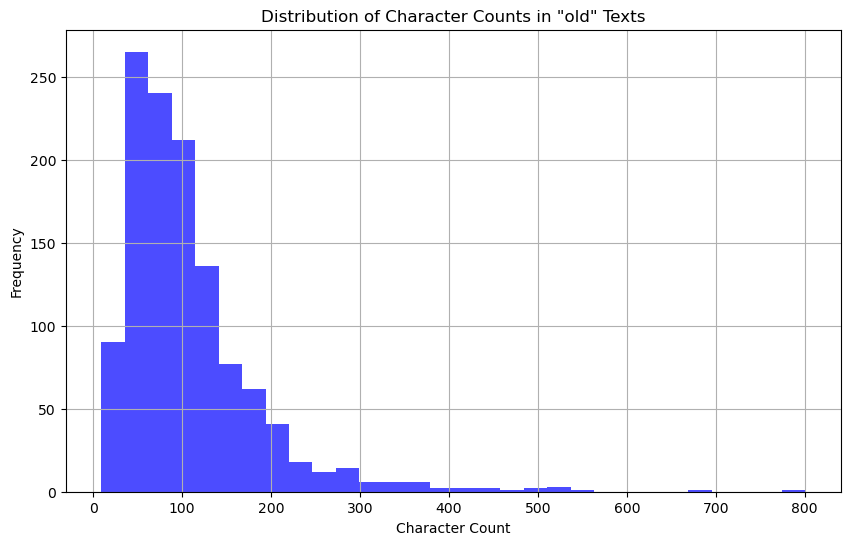

In [12]:
#old열 글자 수 시각화
import pandas as pd
import matplotlib.pyplot as plt

# 'old' 열의 각 텍스트의 글자 수를 계산
data['length'] = data['old'].apply(len)

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['length'].min()
max_count = data['length'].max()
mean_count = data['length'].mean()
median_count = data['length'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 글자 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Character Counts in "old" Texts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 2
최댓값: 199
평균값: 27.47833333333333
중간값: 23.0


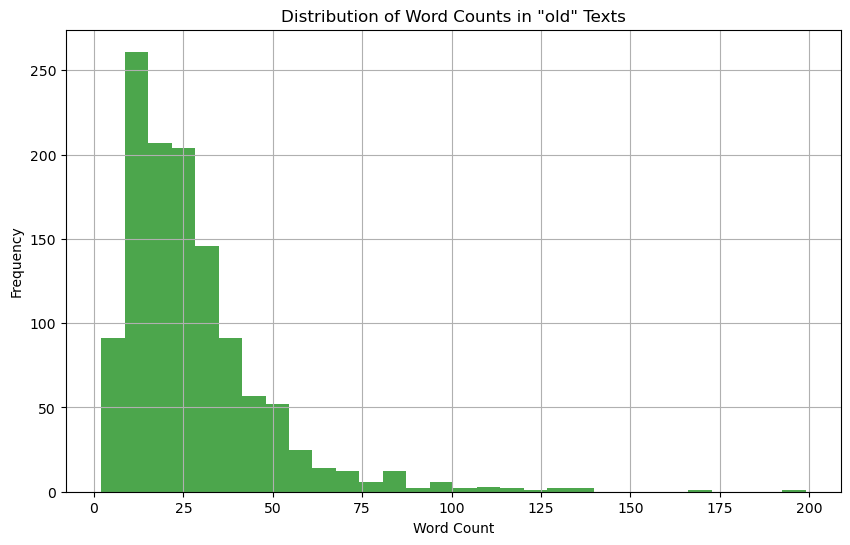

In [13]:
#old열 단어 수 시각화

# 'old' 열의 각 텍스트의 단어 수를 계산
data['word_count'] = data['old'].apply(lambda x: len(str(x).split()))

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['word_count'].min()
max_count = data['word_count'].max()
mean_count = data['word_count'].mean()
median_count = data['word_count'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 단어 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Word Counts in "old" Texts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 705
최댓값: 1492
평균값: 832.6975
중간값: 793.0


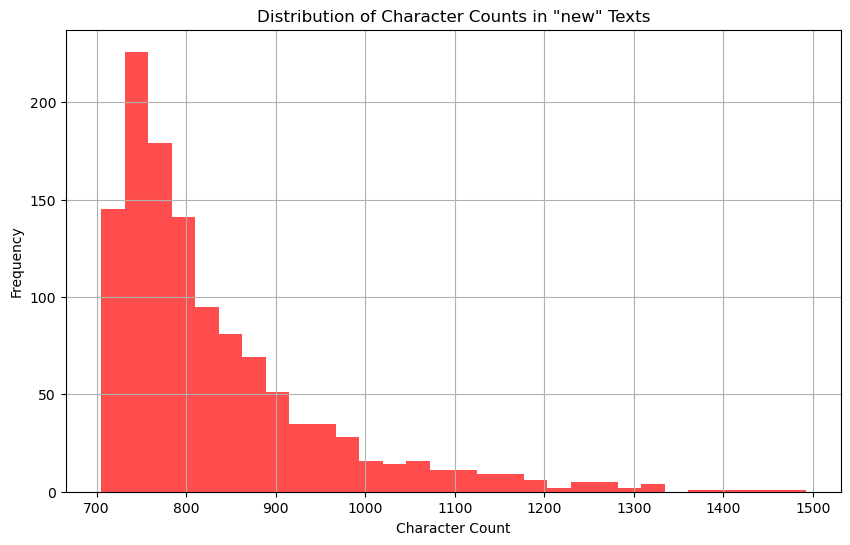

In [14]:
# 'new' 열의 각 텍스트의 글자 수를 계산
data['char_count_new'] = data['new'].apply(len)

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['char_count_new'].min()
max_count = data['char_count_new'].max()
mean_count = data['char_count_new'].mean()
median_count = data['char_count_new'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 글자 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['char_count_new'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Character Counts in "new" Texts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 147
최댓값: 405
평균값: 213.01583333333335
중간값: 203.5


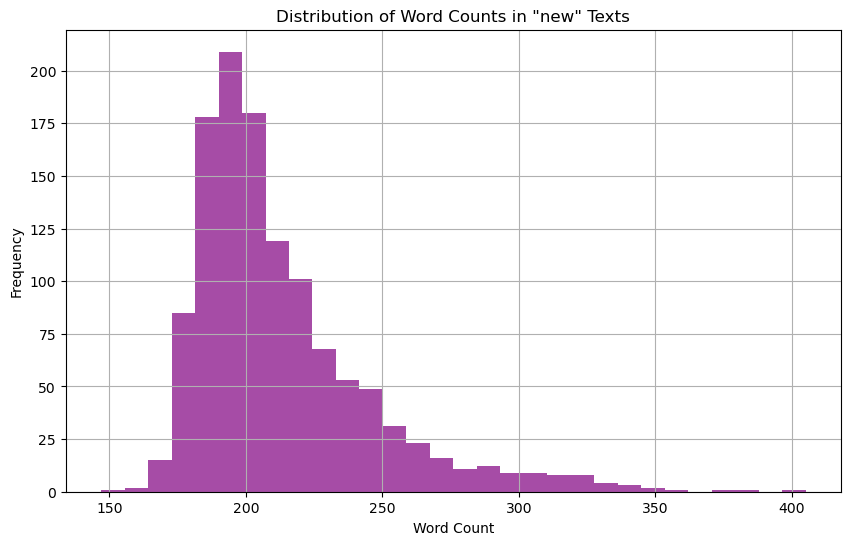

In [15]:
# 'new' 열의 각 텍스트의 단어 수를 계산
data['word_count_new'] = data['new'].apply(lambda x: len(str(x).split()))

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['word_count_new'].min()
max_count = data['word_count_new'].max()
mean_count = data['word_count_new'].mean()
median_count = data['word_count_new'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 단어 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['word_count_new'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Word Counts in "new" Texts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 0
최댓값: 1422
평균값: 725.54
중간값: 703.0


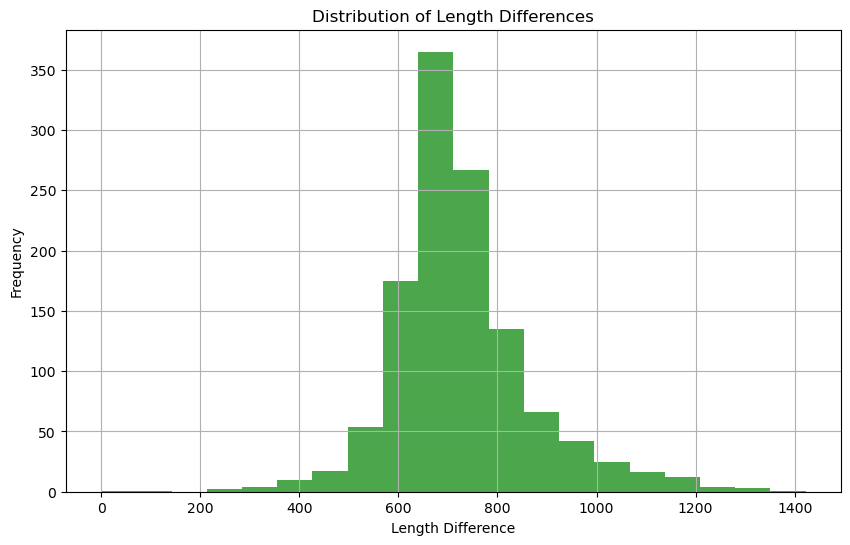

In [16]:
# 글자 수 차이 계산
data['char_count_difference'] = data['char_count_new'] - data['length']

# 글자 수 차이의 최솟값, 최댓값, 평균값, 중간값 출력
min_diff = data['char_count_difference'].min()
max_diff = data['char_count_difference'].max()
mean_diff = data['char_count_difference'].mean()
median_diff = data['char_count_difference'].median()

print(f"최솟값: {min_diff}")
print(f"최댓값: {max_diff}")
print(f"평균값: {mean_diff}")
print(f"중간값: {median_diff}")

# 글자 수 차이의 분포를 히스토그램으로 나타내기
plt.figure(figsize=(10, 6))
plt.hist(data['char_count_difference'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Length Differences')
plt.xlabel('Length Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Minimum difference: 0
Maximum difference: 386
Average difference: 185.5375
Median difference: 180.0


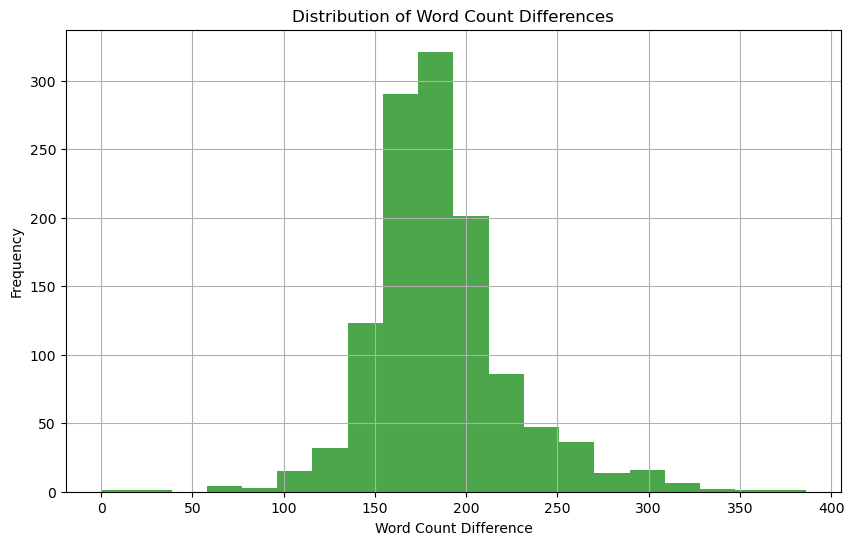

In [17]:
# 'new'와 'old' 열의 각 행별 단어 수 차이 계산
data['word_count_difference'] = data['new'].str.split().apply(len) - data['old'].str.split().apply(len)

# 단어 수 차이의 최솟값, 최댓값, 평균값, 중간값 계산
min_diff = data['word_count_difference'].min()
max_diff = data['word_count_difference'].max()
mean_diff = data['word_count_difference'].mean()
median_diff = data['word_count_difference'].median()

print(f"Minimum difference: {min_diff}")
print(f"Maximum difference: {max_diff}")
print(f"Average difference: {mean_diff}")
print(f"Median difference: {median_diff}")

# 단어 수 차이의 분포를 히스토그램으로 나타내기
plt.figure(figsize=(10, 6))
plt.hist(data['word_count_difference'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Word Count Differences')
plt.xlabel('Word Count Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
# CSV 파일 경로
# file_path = './Data/validation_old_new_data.csv'

# CSV 파일을 데이터프레임으로 불러오기
# data = pd.read_csv(file_path)

# 'new'와 'old' 열의 각 행별 단어 수 차이 계산
data['word_count_difference'] = data['new'].str.split().apply(len) - data['old'].str.split().apply(len)

# 단어 수 차이의 중간값 계산
median_diff = data['word_count_difference'].median()

# 중간값과의 절대 차이 계산
data['diff_from_median'] = abs(data['word_count_difference'] - median_diff)

# 중간값과 가장 가까운 순서대로 정렬하고 상위 100개 행 추출
closest_to_median = data.nsmallest(100, 'diff_from_median')

# 원본 데이터에 'file_path' 열이 없다면, 이 부분을 생략하세요.
if 'file_path' not in data.columns:
    data['file_path'] = file_path

# 'file_path', 'new', 'old' 열로 구성된 새로운 데이터프레임 생성
result_df = closest_to_median[['file_path', 'new', 'old']]

# 결과 출력
print(result_df)

                                              file_path  \
62    ./data/validation/REPORT-literature-06996-0699...   
202   ./data/validation/REPORT-literature-06941-0694...   
204   ./data/validation/REPORT-literature-06978-0697...   
223   ./data/validation/REPORT-literature-00724-0072...   
329   ./data/validation/REPORT-literature-06921-0692...   
...                                                 ...   
1191  ./data/validation/REPORT-literature-06857-0685...   
42    ./data/validation/REPORT-literature-07005-0700...   
52    ./data/validation/REPORT-literature-00621-0062...   
60    ./data/validation/REPORT-literature-00653-0065...   
69    ./data/validation/REPORT-literature-00781-0078...   

                                                    new  \
62    온 몸의 근육이 냉기에 죄어들고 이가 쫏기는 것을 억지로 참아 가면서 한 시간 동안...   
202   “이것은 꼭 당선될 것입니다. 내가 생각해도 조선에서는 최신식이면서도 견실한 건축물...   
204   “용애는 잘 있는지. 우리 학교는 학생이 많은지.” 잠꼬대 비슷이 봉염이는 지껄이다...   
223    “장거리 전화를 거실 작정인가요.” “장거리는 왜.” “동경으로 갔어요. 그저께 ...

In [31]:
#csv파일로 저장
# csv_file_path = './Data/validation_data.csv'
# validation_df.to_csv(csv_file_path, index=False)

In [39]:
# 먼저 result_df의 명시적인 복사본을 생성
result_df = result_df.copy()

# 'gptinput' 열 생성
result_df['gptinput'] = '문단1. ' + result_df['old'] + '\n\n문단2. ' + result_df['new'] + \
                        '\n\n문단1에서 문단2로 변경되었을 때, 추가된 내용을 50자 이내의 한 문장으로 요약해 줘.'

# 'gptoutput' 빈 열 생성
result_df['gptoutput'] = None

result_df


,file_path,new,old,gptinput,gptoutput
62,./data/validation/REPORT-literature-06996-0699...,온 몸의 근육이 냉기에 죄어들고 이가 쫏기는 것을 억지로 참아 가면서 한 시간 동안...,온 몸의 근육이 냉기에 죄어들고 이가 쫏기는 것을 억지로 참아 가면서 한 시간 동안...,문단1. 온 몸의 근육이 냉기에 죄어들고 이가 쫏기는 것을 억지로 참아 가면서 한 ...,None
202,./data/validation/REPORT-literature-06941-0694...,“이것은 꼭 당선될 것입니다. 내가 생각해도 조선에서는 최신식이면서도 견실한 건축물...,“이것은 꼭 당선될 것입니다. 내가 생각해도 조선에서는 최신식이면서도 견실한 건축물...,문단1. “이것은 꼭 당선될 것입니다. 내가 생각해도 조선에서는 최신식이면서도 견실...,None
204,./data/validation/REPORT-literature-06978-0697...,“용애는 잘 있는지. 우리 학교는 학생이 많은지.” 잠꼬대 비슷이 봉염이는 지껄이다...,“용애는 잘 있는지. 우리 학교는 학생이 많은지.”,문단1. “용애는 잘 있는지. 우리 학교는 학생이 많은지.”\n\n문단2. “용애는...,None
223,./data/validation/REPORT-literature-00724-0072...,“장거리 전화를 거실 작정인가요.” “장거리는 왜.” “동경으로 갔어요. 그저께 ...,“장거리 전화를 거실 작정인가요.” “장거리는 왜.”,문단1. “장거리 전화를 거실 작정인가요.” “장거리는 왜.”\n\n문단2. “...,None
329,./data/validation/REPORT-literature-06921-0692...,"그러나, 지금 옥매로서는 과연 이 지경에까지 이르렀을지. 석구와 옥매 사 이에는 ...","그러나, 지금 옥매로서는 과연 이 지경에까지 이르렀을지. 석구와 옥매 사 이에는 ...","문단1. 그러나, 지금 옥매로서는 과연 이 지경에까지 이르렀을지. 석구와 옥매 사...",None
...,...,...,...,...,...
1191,./data/validation/REPORT-literature-06857-0685...,그 자리만 모래가 축축이 젖어 있다. 미칠 듯한 심사였다. 학수는 달려들어 그 자리...,그 자리만 모래가 축축이 젖어 있다. 미칠 듯한 심사였다.,문단1. 그 자리만 모래가 축축이 젖어 있다. 미칠 듯한 심사였다.\n\n문단2. ...,None
42,./data/validation/REPORT-literature-07005-0700...,일본은 인제는 세계에서 도저히 어찌할 수 없는 커다란 존재다. 조선 민족은 일본의 ...,일본은 인제는 세계에서 도저히 어찌할 수 없는 커다란 존재다. 조선 민족은 일본의 ...,문단1. 일본은 인제는 세계에서 도저히 어찌할 수 없는 커다란 존재다. 조선 민족은...,None
52,./data/validation/REPORT-literature-00621-0062...,이리하여 논개의 마음에는 그들에게 대한 적개심이 맹렬히 불타올랐다. 이튿날 논개의...,이리하여 논개의 마음에는 그들에게 대한 적개심이 맹렬히 불타올랐다. 이튿날 논개의...,문단1. 이리하여 논개의 마음에는 그들에게 대한 적개심이 맹렬히 불타올랐다. 이튿...,None
60,./data/validation/REPORT-literature-00653-0065...,유무(有無) 나는 그러한 일이 이 현실에 실재해 있는지? 없는지? 그가 묻던 말에 ...,유무(有無) 나는 그러한 일이 이 현실에 실재해 있는지? 없는지?,문단1. 유무(有無) 나는 그러한 일이 이 현실에 실재해 있는지? 없는지?\n\n문...,None


In [40]:
result_df.shape

(100, 5)

In [44]:
#csv파일로 저장
csv_file_path = './Data/validation_data_chatgptin.csv'
result_df.to_csv(csv_file_path, index=False)

## data preprocessing
gptoutput이 입력되어 있는 상태에서 수행

In [ ]:
import pandas as pd
import difflib

In [ ]:
# CSV 파일 경로
file_path = "./data/validaiton_data_chatgptin.csv"

# CSV 파일을 데이터프레임으로 불러오기
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head()


In [ ]:
# 변화를 감지하여 토큰화된 텍스트 생성하는 함수
def detect_changes(old_text, new_text):
    added_parts = []
    for diff in difflib.ndiff(old_text, new_text):
        if diff[0] == '+':
            added_parts.append(diff[2:])
    return old_text + "[ADDED]" + "".join(added_parts) + "[/ADDED]"

# 'text' 열에 변화를 감지한 텍스트 추가
df['text'] = df.apply(lambda row: detect_changes(row['old'], row['new']), axis=1)

# 결과 확인
df

In [ ]:
# 'file_path', 'new', 'old', 'gptinput' 열 삭제
df.drop(columns=['file_path', 'new', 'old', 'gptinput'], inplace=True)

# 'gptoutput' 열 이름을 'summary'로 변경
df.rename(columns={'gptoutput': 'summary'}, inplace=True)

df

In [ ]:
#csv파일로 저장
csv_file_path = './data/validation_data.csv'
df.to_csv(csv_file_path, index=False)